잘하시는 분 따라하기!!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 첫번째 시도

## 데이터 읽기

In [5]:
train_df = pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train + submission 데이터 합치기

In [7]:
all_df = pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [8]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 안쓸 컬럼 삭제

In [9]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  377 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     600 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


## 결측치 처리

In [10]:
all_df = all_df.fillna(0)

In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            843 non-null    int64  
 1   dir_prev_bfnum  843 non-null    float64
 2   dir_prev_num    843 non-null    int64  
 3   num_staff       843 non-null    int64  
 4   num_actor       843 non-null    int64  
 5   box_off_num     843 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 46.1 KB


## 전처리 전의 데이터 분포 보기

hist를 찍어봐야 한다는 것을 배웠다. \
이상치를 확인하는 가장 좋은 방법 \

### time

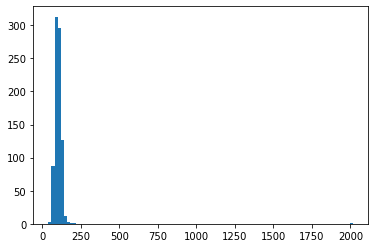

In [12]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

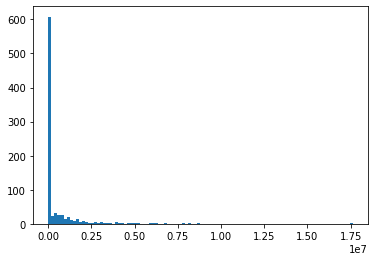

In [13]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

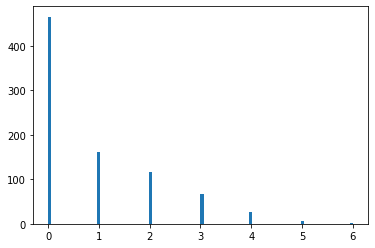

In [14]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

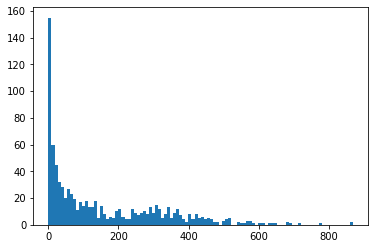

In [15]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

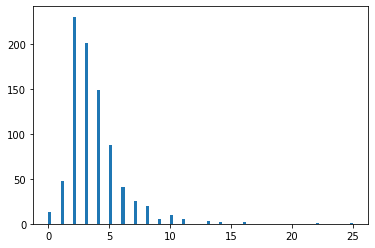

In [16]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

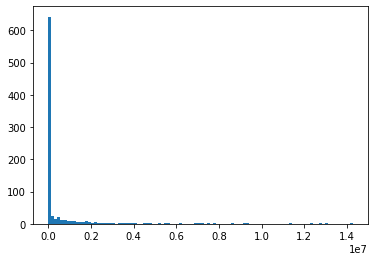

In [17]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

250 이상 -> 250

In [18]:
all_df.loc[all_df.time>200, "time"] = 200

Time의 경우 어벤져스 엔드게임 같은 경우도\
런닝타임: 182분으로 내 생각에는 200분으로 맞춰야 한다고 생각하지만 \
일단 따라해보자

### dir_prev_bfnum

1을 더한 로그처리

In [19]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리

In [20]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

### num_actor

10 보다 큰 이상치를 10으로 변환

In [21]:
all_df.loc[all_df.num_actor>10, "num_actor"] = 10

### box_off_num

1을 더한 로그처리

In [22]:
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

## Normalization

In [23]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [24]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

## 전처리 후의 데이터 분포 보기

### time

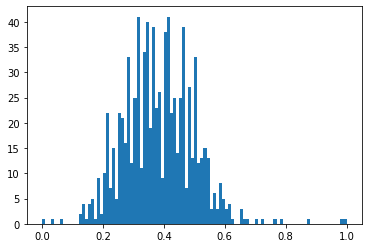

In [25]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

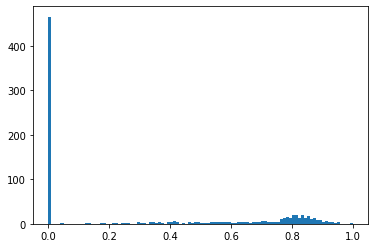

In [26]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

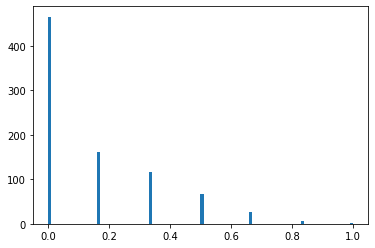

In [27]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

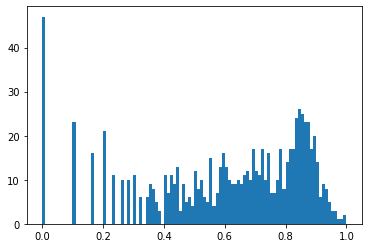

In [28]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

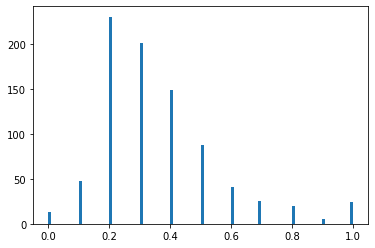

In [29]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

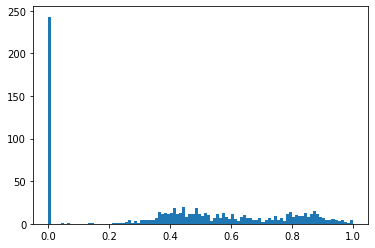

In [30]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## tain, test, submission 데이터 분리

In [31]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))


500
100
243


## x, y로 분리

In [32]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()
print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()
print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)


(500, 5)
(500,)
(100, 5)
(100,)
(243, 5)


## 딥러닝 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


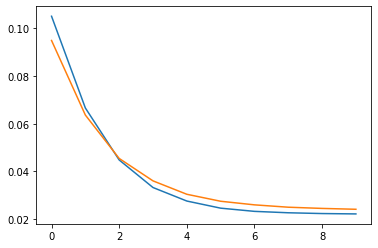

4/4 [==============================] - 0s 3ms/step - loss: 0.0181 - mape: 18.5668
loss= 0.018096908926963806
mape= 18.56675910949707


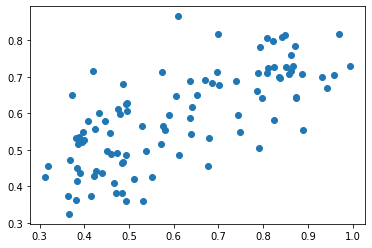

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(5,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

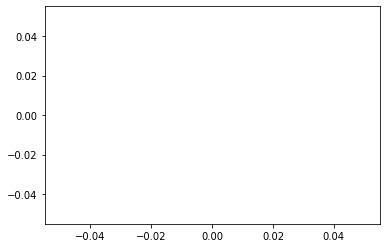

In [34]:
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()


## RMSE 계산하기

In [35]:
predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse =  tf.Tensor(1888229.6, shape=(), dtype=float32)


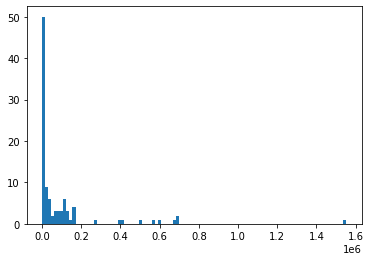

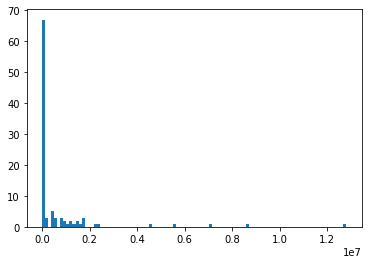

In [36]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()


## 예측하기

In [37]:
predicted = model.predict(submission_x)

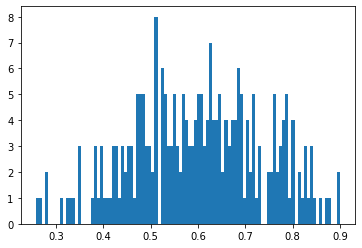

In [38]:
plt.hist(predicted, bins=100)
plt.show()

In [39]:
predicted = predicted * ( y_max - y_min) + y_min

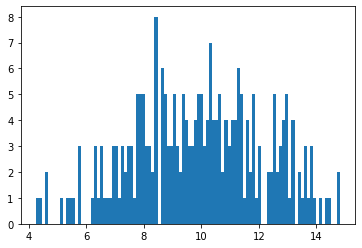

In [40]:
plt.hist(predicted, bins=100)
plt.show()

In [41]:
predicted = np.exp(predicted) - 1.

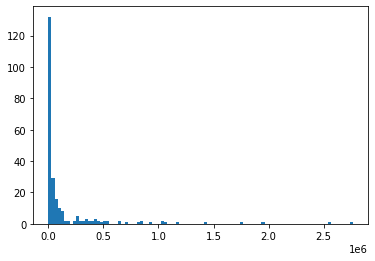

In [42]:
plt.hist(predicted, bins=100)
plt.show()

## submission 파일 만들기

In [43]:
!head submission.csv

head: cannot open 'submission.csv' for reading: No such file or directory


In [44]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [45]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [46]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,269561
1,아빠가 여자를 좋아해,35327
2,하모니,130923
3,의형제,426691
4,평행 이론,447683


In [47]:
final_df.to_csv("submission.csv", index=False)

In [48]:
!head submission.csv

title,box_off_num
용서는 없다,269561
아빠가 여자를 좋아해,35327
하모니,130923
의형제,426691
평행 이론,447683
회오리 바람,29551
경계도시 2,2492
이웃집 남자,16823
아마존의 눈물 극장판,11397


# 두번째 시도

카테고리 데이터 추가

## 데이터 읽기

In [49]:
train_df = pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [50]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train + submission 데이터 합치기

In [51]:
all_df = pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [52]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## 카테고리 데이터 인코딩

In [53]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

## 카테고리 데이터 one-hot 인코딩

In [54]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])

In [55]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 232 entries, title to screening_rat_code_3
dtypes: category(3), float64(2), int64(4), object(3), uint8(220)
memory usage: 262.5+ KB


## 안쓸 컬럼 삭제

In [56]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


## 결측치 처리

In [57]:
all_df = all_df.fillna(0)

In [58]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 226 entries, time to screening_rat_code_3
dtypes: float64(2), int64(4), uint8(220)
memory usage: 227.2 KB


## 전처리 전의 데이터 분포 보기

### time

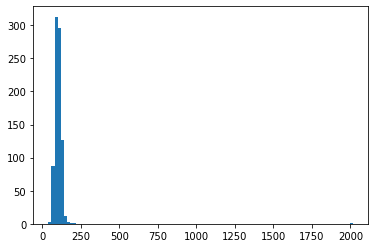

In [59]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

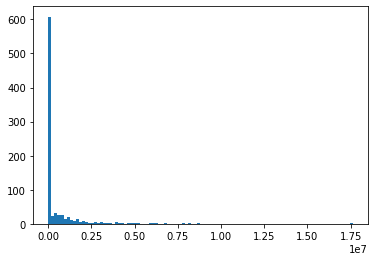

In [60]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

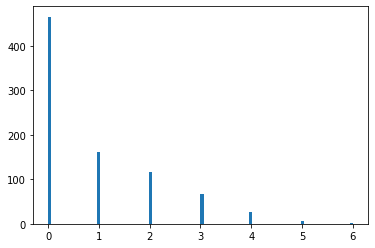

In [61]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

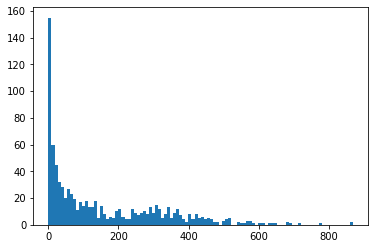

In [62]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

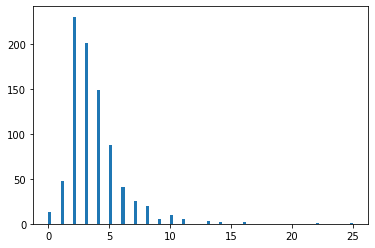

In [63]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

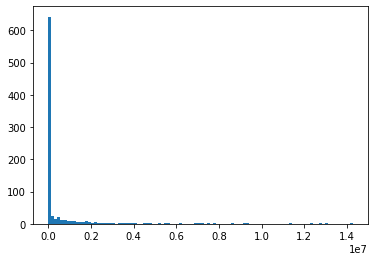

In [64]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

250이 넘는 이상치는 250으로 바꾼다.

In [65]:
all_df.loc[all_df.time>200, "time"] = 200

### dir_prev_bfnum

1을 더한 로그처리 한다.

In [66]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리 한다.

In [67]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

### num_actor

10 보다 큰 이상치를 10으로 변환

In [68]:
all_df.loc[all_df.num_actor>10, "num_actor"] = 10

### box_off_num

1을 더한 로그처리 한다.

In [69]:
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

## Normalization

In [70]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [71]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

## 전처리 후의 데이터 분포 보기

### time

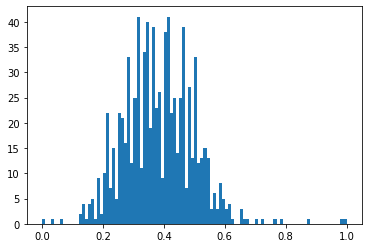

In [72]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

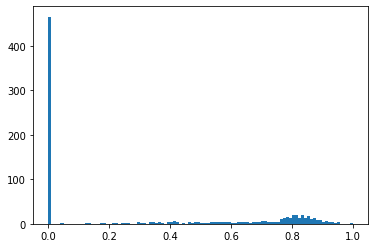

In [73]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

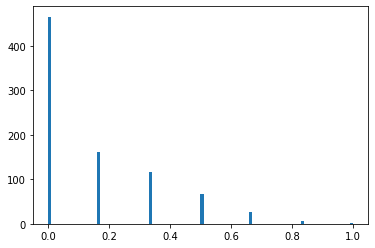

In [74]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

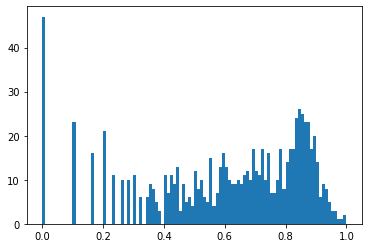

In [75]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

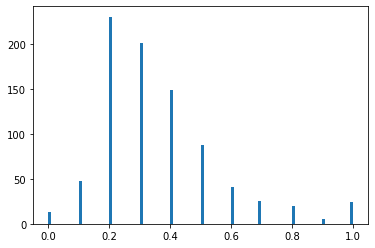

In [76]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

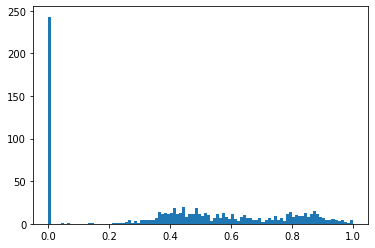

In [77]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## tain, test, submission 데이터 분리

In [78]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))


500
100
243


## x, y로 분리

In [79]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()
print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()
print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)


(500, 225)
(500,)
(100, 225)
(100,)
(243, 225)


## 딥러닝 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                2260      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,381
Trainable params: 2,381
Non-trainable params: 0
_________________________________________________________________


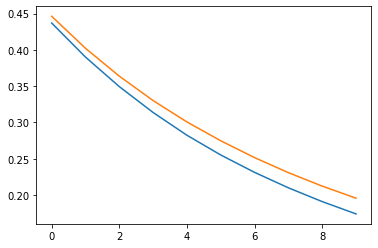

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


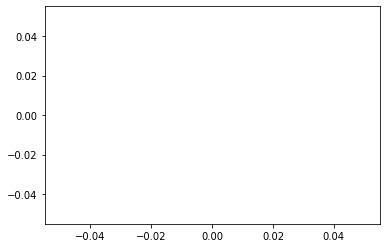

In [81]:
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()


4/4 [==============================] - 0s 4ms/step - loss: 0.1631 - mape: 56.2032
loss= 0.16309022903442383
mape= 56.203224182128906


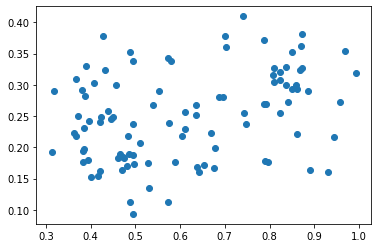

In [82]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [83]:
predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse =  tf.Tensor(1952996.4, shape=(), dtype=float32)


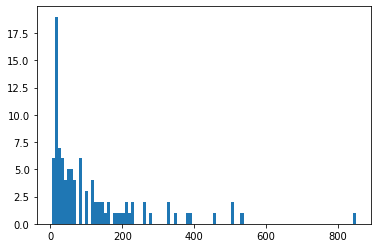

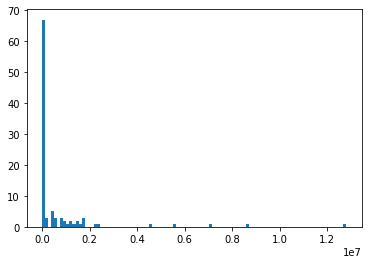

In [84]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()


## 예측하기

In [85]:
predicted = model.predict(submission_x)

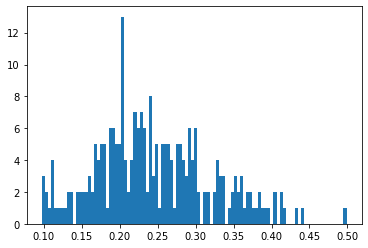

In [86]:
plt.hist(predicted, bins=100)
plt.show()

In [87]:
predicted = predicted * ( y_max - y_min) + y_min

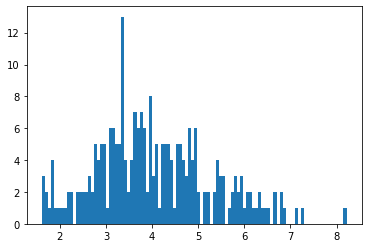

In [88]:
plt.hist(predicted, bins=100)
plt.show()

In [89]:
predicted = np.exp(predicted) - 1.

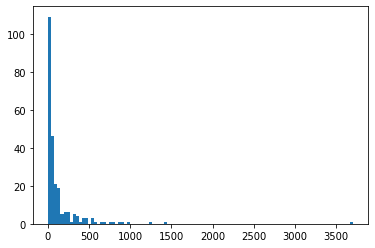

In [90]:
plt.hist(predicted, bins=100)
plt.show()

## submission 파일 만들기

In [91]:
!head submission.csv

title,box_off_num
용서는 없다,269561
아빠가 여자를 좋아해,35327
하모니,130923
의형제,426691
평행 이론,447683
회오리 바람,29551
경계도시 2,2492
이웃집 남자,16823
아마존의 눈물 극장판,11397


In [92]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [93]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [94]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,50
1,아빠가 여자를 좋아해,207
2,하모니,36
3,의형제,554
4,평행 이론,145


In [95]:
final_df.to_csv("submission.csv", index=False)

In [96]:
!head submission.csv

title,box_off_num
용서는 없다,50
아빠가 여자를 좋아해,207
하모니,36
의형제,554
평행 이론,145
회오리 바람,59
경계도시 2,9
이웃집 남자,140
아마존의 눈물 극장판,34


## batch_size 찾기

In [97]:
import time

for batch_size in [16, 32, 64, 128, 256, 512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size, ":", time.time() - start)


16 : 0.6809179782867432
32 : 0.36801815032958984
64 : 0.23258042335510254
128 : 0.20137858390808105
256 : 0.17886018753051758
512 : 0.18982172012329102
1024 : 0.18860268592834473
2048 : 0.1738448143005371
4096 : 0.18786835670471191
8192 : 0.17567920684814453


# 세번째 시도

release_time 컬럼 사용

## 데이터 읽기

In [98]:
train_df = pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [99]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train + submission 데이터 합치기

In [100]:
all_df = pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [101]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## release_time 값 조정

'2021-12-31' 같은 값을 '2021-12'로 변경

In [102]:
print(all_df.release_time[:5])
all_df['release_time'] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


## 카테고리 데이터 인코딩

In [103]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

## 카테고리 데이터 one-hot 인코딩

In [104]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])

In [105]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 304 entries, title to release_time_code_71
dtypes: category(4), float64(2), int64(4), object(2), uint8(292)
memory usage: 319.0+ KB


## 안쓸 컬럼 삭제

In [106]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


## 결측치 처리

In [107]:
all_df = all_df.fillna(0)

In [108]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 298 entries, time to release_time_code_71
dtypes: float64(2), int64(4), uint8(292)
memory usage: 286.5 KB


## 전처리 전의 데이터 분포 보기

### time

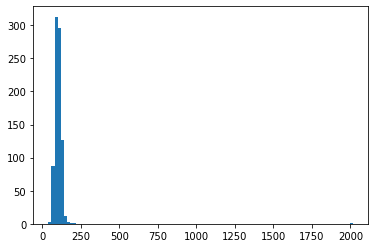

In [109]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

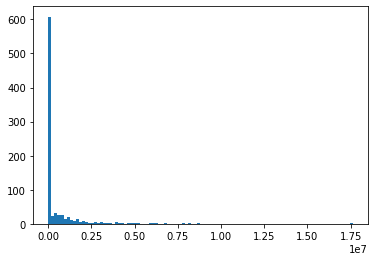

In [110]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

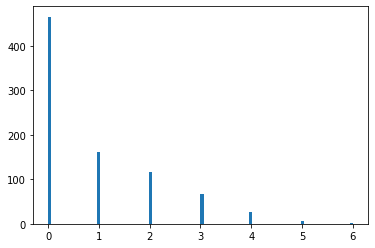

In [111]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

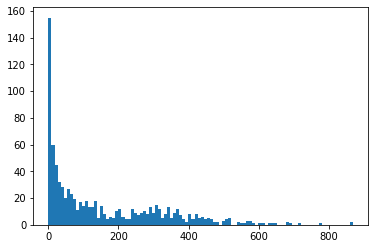

In [112]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

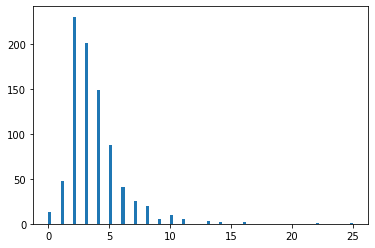

In [113]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

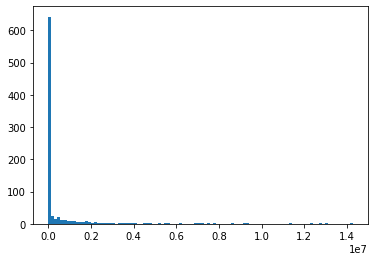

In [114]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

250이 넘는 이상치는 250으로 바꾼다.

In [115]:
all_df.loc[all_df.time>200, "time"] = 200

### dir_prev_bfnum

1을 더한 로그처리 한다.

In [116]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리 한다.

In [117]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

### num_actor

10 보다 큰 이상치를 10으로 변환

In [118]:
all_df.loc[all_df.num_actor>10, "num_actor"] = 10

### box_off_num

1을 더한 로그처리 한다.

In [119]:
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

## Normalization

In [120]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [121]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

## 전처리 후의 데이터 분포 보기

### time

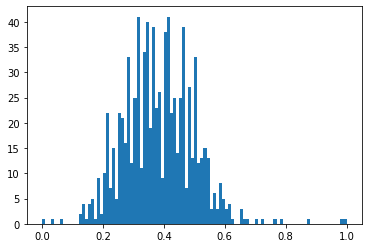

In [122]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

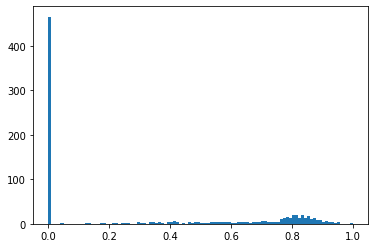

In [123]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

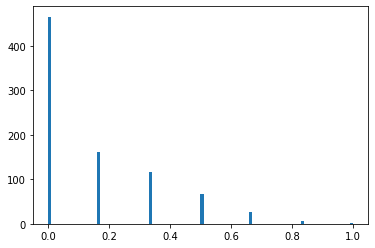

In [124]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

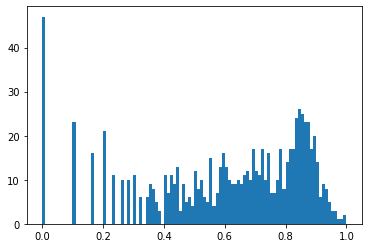

In [125]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

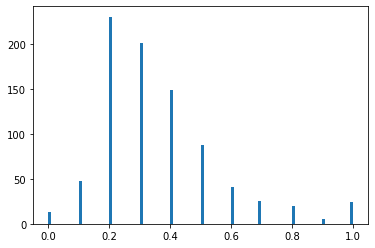

In [126]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

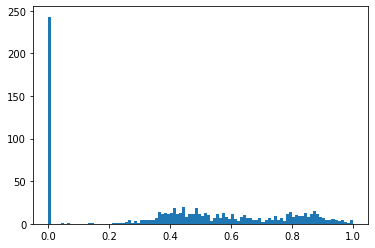

In [127]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## tain, test, submission 데이터 분리

In [128]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))


500
100
243


## x, y로 분리

In [129]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()
print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()
print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)


(500, 297)
(500,)
(100, 297)
(100,)
(243, 297)


## 딥러닝 학습

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                2980      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


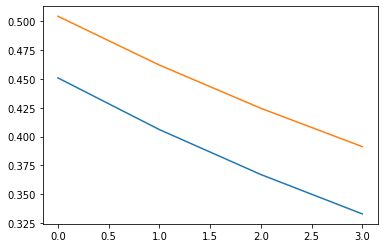

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1*4, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


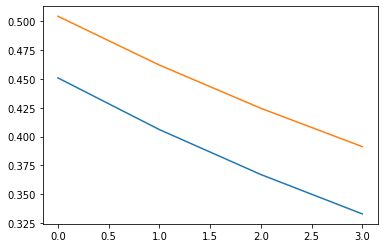

In [131]:
plt.plot(history.history['loss'][-500:])
plt.plot(history.history['val_loss'][-500:])
plt.show()


In [132]:

history = model.fit(train_x, train_y, epochs=1*4, verbose=0, batch_size=512, validation_split=0.1)


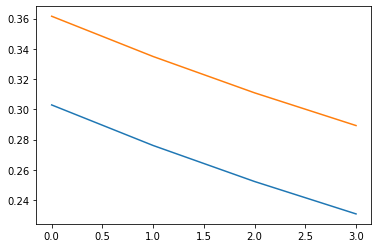

In [133]:
plt.plot(history.history['loss'][-4000:])
plt.plot(history.history['val_loss'][-4000:])
plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.2289 - mape: 67.4875
loss= 0.2289350926876068
mape= 67.48748779296875


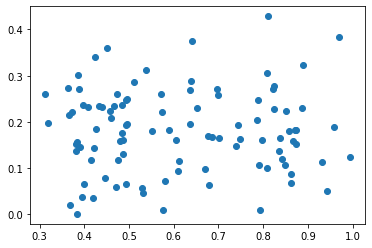

In [134]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [135]:
predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse =  tf.Tensor(1953019.9, shape=(), dtype=float32)


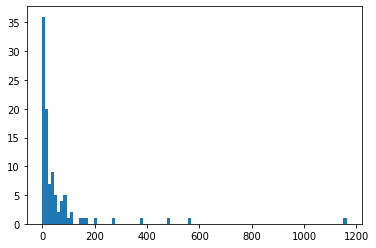

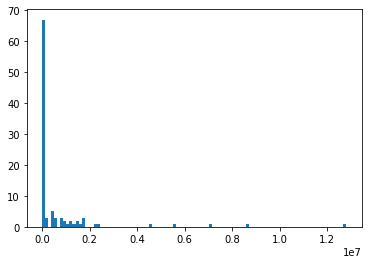

In [136]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()


## 예측하기

In [137]:
predicted = model.predict(submission_x)

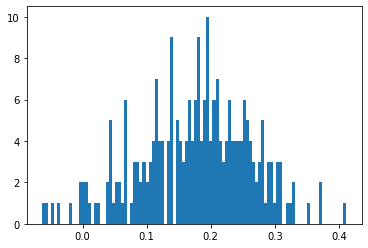

In [138]:
plt.hist(predicted, bins=100)
plt.show()

In [139]:
predicted = predicted * ( y_max - y_min) + y_min

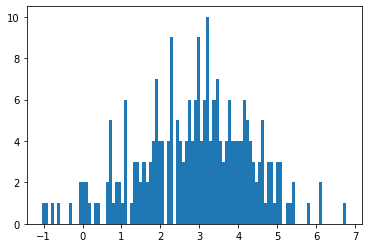

In [140]:
plt.hist(predicted, bins=100)
plt.show()

In [141]:
predicted = np.exp(predicted) - 1.

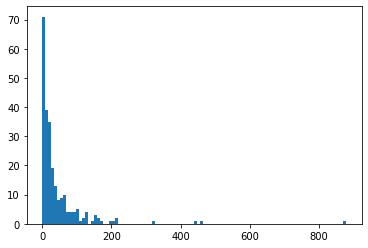

In [142]:
plt.hist(predicted, bins=100)
plt.show()

## submission 파일 만들기

In [143]:
!head submission.csv

title,box_off_num
용서는 없다,50
아빠가 여자를 좋아해,207
하모니,36
의형제,554
평행 이론,145
회오리 바람,59
경계도시 2,9
이웃집 남자,140
아마존의 눈물 극장판,34


In [144]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [145]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [146]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,28
1,아빠가 여자를 좋아해,6
2,하모니,52
3,의형제,22
4,평행 이론,7


In [147]:
final_df.to_csv("submission.csv", index=False)

In [148]:
!head submission.csv

title,box_off_num
용서는 없다,28
아빠가 여자를 좋아해,6
하모니,52
의형제,22
평행 이론,7
회오리 바람,17
경계도시 2,5
이웃집 남자,151
아마존의 눈물 극장판,19


## batch_size 찾기

In [149]:
import time

for batch_size in [16, 32, 64, 128, 256, 512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size, ":", time.time() - start)


16 : 0.36713528633117676
32 : 0.3529505729675293
64 : 0.21961736679077148
128 : 0.20019102096557617
256 : 0.19636774063110352
512 : 0.16803669929504395
1024 : 0.17133712768554688
2048 : 0.18104004859924316
4096 : 0.18506431579589844
8192 : 0.17177248001098633


# 네번째 시도

director 컬럼 사용, 모델 크기 키우기

## 데이터 읽기

In [150]:
train_df = pd.read_csv("movies_train.csv")
train_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [151]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## train + submission 데이터 합치기

In [152]:
all_df = pd.concat([train_df, submission_df])
all_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387.0


In [153]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     600 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 85.6+ KB


## release_time 값 조정

'2021-12-31' 같은 값을 '2021-12'로 변경

In [154]:
print(all_df.release_time[:5])
all_df['release_time'] = all_df.release_time.str[:7]
print(all_df.release_time[:5])

0    2012-11-22
1    2015-11-19
2    2013-06-05
3    2012-07-12
4    2010-11-04
Name: release_time, dtype: object
0    2012-11
1    2015-11
2    2013-06
3    2012-07
4    2010-11
Name: release_time, dtype: object


## director 컬럼 카테고리화

In [155]:
print(len(all_df.director.unique()))
all_df.loc[all_df.dir_prev_num==0, 'director'] = "무명감독"
print(len(all_df.director.unique()))

614
291


## 카테고리 데이터 인코딩

In [156]:
all_df.distributor = all_df.distributor.astype('category')
all_df['distributor_code'] = all_df.distributor.cat.codes

all_df.genre = all_df.genre.astype('category')
all_df['genre_code'] = all_df.genre.cat.codes

all_df.screening_rat = all_df.screening_rat.astype('category')
all_df['screening_rat_code'] = all_df.screening_rat.cat.codes

all_df.release_time = all_df.release_time.astype('category')
all_df['release_time_code'] = all_df.release_time.cat.codes

all_df.director = all_df.director.astype('category')
all_df['director_code'] = all_df.director.cat.codes

## 카테고리 데이터 one-hot 인코딩

In [157]:
all_df = pd.get_dummies(all_df, columns = ['distributor_code'])
all_df = pd.get_dummies(all_df, columns = ['genre_code'])
all_df = pd.get_dummies(all_df, columns = ['screening_rat_code'])
all_df = pd.get_dummies(all_df, columns = ['release_time_code'])
all_df = pd.get_dummies(all_df, columns = ['director_code'])

In [158]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 595 entries, title to director_code_290
dtypes: category(5), float64(2), int64(4), object(1), uint8(583)
memory usage: 565.9+ KB


## 안쓸 컬럼 삭제

In [159]:
all_df.drop(columns=["title", 
                     "distributor", 
                     "genre", 
                     "release_time", 
                     "screening_rat", 
                     "director"], inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


## 결측치 처리

In [160]:
all_df = all_df.fillna(0)

In [161]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Columns: 589 entries, time to director_code_290
dtypes: float64(2), int64(4), uint8(583)
memory usage: 526.1 KB


## 전처리 전의 데이터 분포 보기

### time

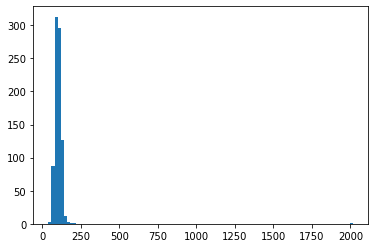

In [162]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

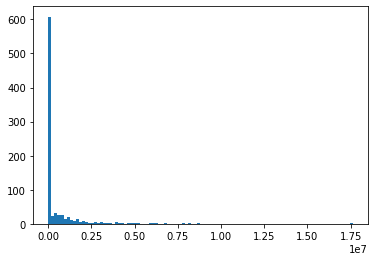

In [163]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

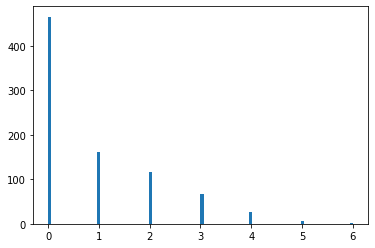

In [164]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

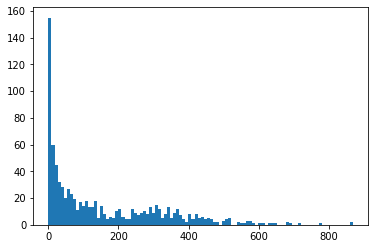

In [165]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

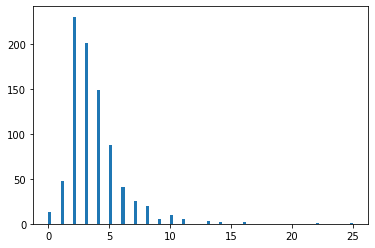

In [166]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

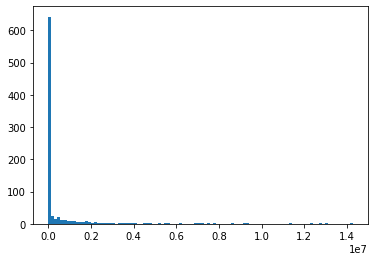

In [167]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## 컬럼별 전처리

### time

250이 넘는 이상치는 250으로 바꾼다.

In [168]:
all_df.loc[all_df.time>200, "time"] = 200

### dir_prev_bfnum

1을 더한 로그처리 한다.

In [169]:
all_df['dir_prev_bfnum'] = np.log1p(all_df.dir_prev_bfnum)

### num_staff

1을 더한 로그처리 한다.

In [170]:
all_df['num_staff'] = np.log1p(all_df.num_staff)

### num_actor

10 보다 큰 이상치를 10으로 변환

In [171]:
all_df.loc[all_df.num_actor>10, "num_actor"] = 10

### box_off_num

1을 더한 로그처리 한다.

In [172]:
all_df['box_off_num'] = np.log1p(all_df.box_off_num)

## Normalization

In [173]:
all_df['time']            = (all_df.time - all_df.time.min()) / ( all_df.time.max() - all_df.time.min())
all_df['dir_prev_bfnum']  = (all_df.dir_prev_bfnum - all_df.dir_prev_bfnum.min()) / ( all_df.dir_prev_bfnum.max() - all_df.dir_prev_bfnum.min())
all_df['dir_prev_num']    = (all_df.dir_prev_num - all_df.dir_prev_num.min()) / ( all_df.dir_prev_num.max() - all_df.dir_prev_num.min())
all_df['num_staff']       = (all_df.num_staff - all_df.num_staff.min()) / ( all_df.num_staff.max() - all_df.num_staff.min())
all_df['num_actor']       = (all_df.num_actor - all_df.num_actor.min()) / ( all_df.num_actor.max() - all_df.num_actor.min())

In [174]:
y_max = all_df.box_off_num.max()
y_min = all_df.box_off_num.min()

all_df['box_off_num'] = (all_df.box_off_num - y_min) / ( y_max - y_min )

## 전처리 후의 데이터 분포 보기

### time

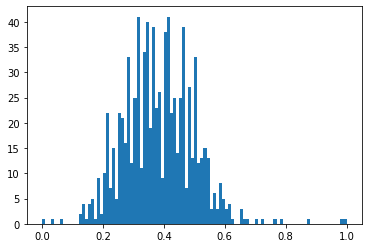

In [175]:
plt.hist(all_df.time, bins=100)
plt.show()

### dir_prev_bfnum  

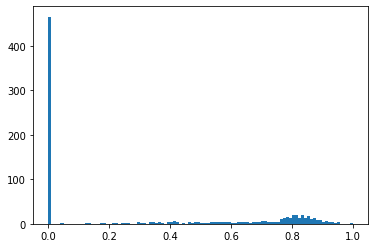

In [176]:
plt.hist(all_df.dir_prev_bfnum, bins=100)
plt.show()

### dir_prev_num    

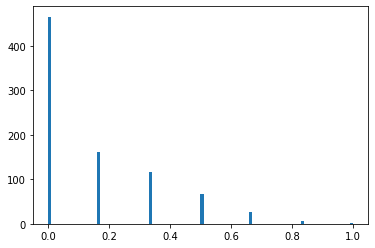

In [177]:
plt.hist(all_df.dir_prev_num, bins=100)
plt.show()

### num_staff       

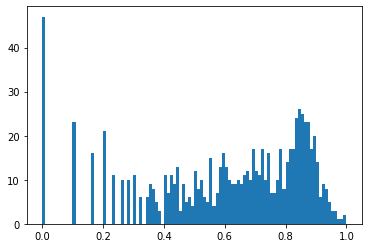

In [178]:
plt.hist(all_df.num_staff, bins=100)
plt.show()

### num_actor       

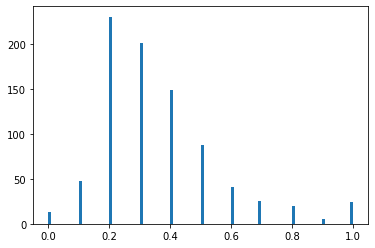

In [179]:
plt.hist(all_df.num_actor, bins=100)
plt.show()

### box_off_num     

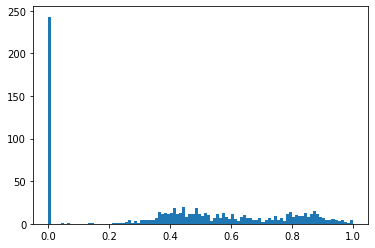

In [180]:
plt.hist(all_df.box_off_num, bins=100)
plt.show()

## tain, test, submission 데이터 분리

In [181]:
train_df = all_df[:500]
test_df = all_df[500:600]
submission_df = all_df[600:]

print(len(train_df))
print(len(test_df))
print(len(submission_df))


500
100
243


## x, y로 분리

In [182]:
train_y = train_df.box_off_num.to_numpy()
train_x_df = train_df.drop(columns=["box_off_num"])
train_x = train_x_df.to_numpy()
print(train_x.shape)
print(train_y.shape)

test_y = test_df.box_off_num.to_numpy()
test_x_df = test_df.drop(columns=["box_off_num"])
test_x = test_x_df.to_numpy()
print(test_x.shape)
print(test_y.shape)

submission_x_df = submission_df.drop(columns=["box_off_num"])
submission_x = submission_x_df.to_numpy()
print(submission_x.shape)


(500, 588)
(500,)
(100, 588)
(100,)
(243, 588)


## 딥러닝 학습

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               150784    
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 153,365
Trainable params: 153,365
Non-trainable params: 0
_________________________________________________________________


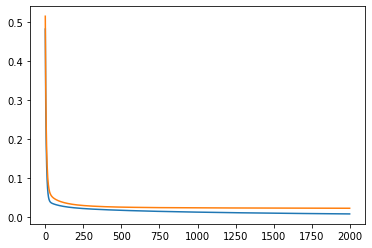

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(256, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000*2, verbose=0, batch_size=512, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


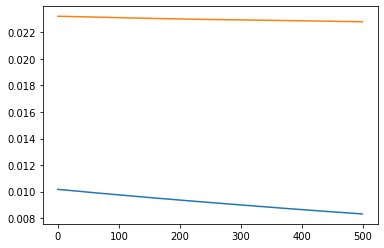

In [184]:
plt.plot(history.history['loss'][-500:])
plt.plot(history.history['val_loss'][-500:])
plt.show()


4/4 [==============================] - 0s 3ms/step - loss: 0.0176 - mape: 17.5819
loss= 0.017609281465411186
mape= 17.581880569458008


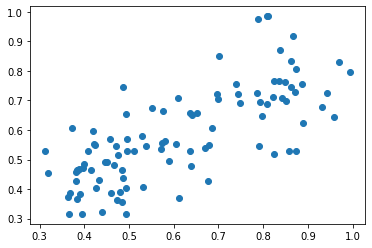

In [185]:
loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

## RMSE 계산하기

In [186]:
predicted = y_ * ( y_max - y_min) + y_min
predicted = np.exp(predicted) - 1.

org_test_y = test_y * ( y_max - y_min) + y_min
org_test_y = np.exp(org_test_y) - 1.

rmse =  tf.Tensor(2548137.8, shape=(), dtype=float32)


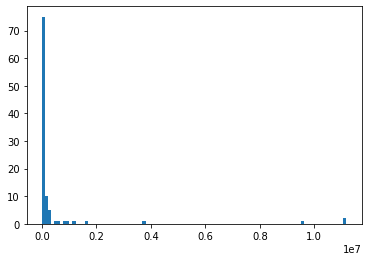

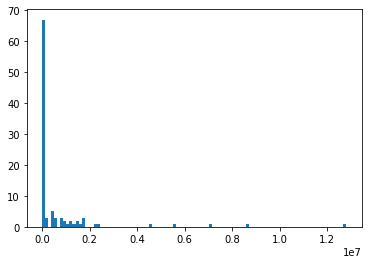

In [187]:
from tensorflow.keras.metrics import RootMeanSquaredError

rmse = RootMeanSquaredError()(org_test_y, predicted)
print("rmse = ", rmse)

plt.hist(predicted, bins=100)
plt.show()
plt.hist(org_test_y, bins=100)
plt.show()


## 예측하기

In [188]:
predicted = model.predict(submission_x)

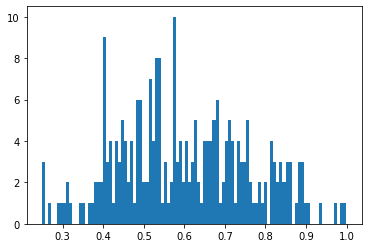

In [189]:
plt.hist(predicted, bins=100)
plt.show()

In [190]:
predicted = predicted * ( y_max - y_min) + y_min

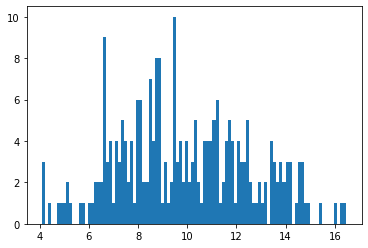

In [191]:
plt.hist(predicted, bins=100)
plt.show()

In [192]:
predicted = np.exp(predicted) - 1.

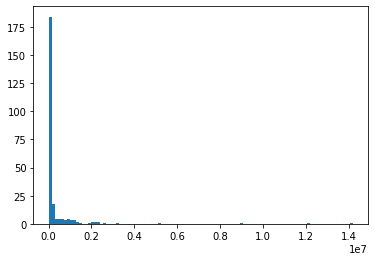

In [193]:
plt.hist(predicted, bins=100)
plt.show()

## submission 파일 만들기

In [194]:
!head submission.csv

title,box_off_num
용서는 없다,28
아빠가 여자를 좋아해,6
하모니,52
의형제,22
평행 이론,7
회오리 바람,17
경계도시 2,5
이웃집 남자,151
아마존의 눈물 극장판,19


In [195]:
submission_df = pd.read_csv("movies_test.csv")
submission_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [196]:
final_df = pd.DataFrame(submission_df.title)
final_df.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [197]:
final_df['box_off_num'] = predicted.astype(np.int)
final_df.head()

,title,box_off_num
0,용서는 없다,138882
1,아빠가 여자를 좋아해,205805
2,하모니,1494107
3,의형제,1020269
4,평행 이론,75615


In [198]:
final_df.to_csv("submission.csv", index=False)

In [199]:
!head submission.csv

title,box_off_num
용서는 없다,138882
아빠가 여자를 좋아해,205805
하모니,1494107
의형제,1020269
평행 이론,75615
회오리 바람,30717
경계도시 2,3432
이웃집 남자,6310
아마존의 눈물 극장판,17852


## batch_size 찾기

In [200]:
import time

for batch_size in [16, 32, 64, 128, 256, 512, 512*2, 512*4, 512*8, 512*16]:
  start = time.time()
  history = model.fit(train_x, train_y, epochs=4, verbose=0, batch_size=batch_size, validation_split=0.1)
  print(batch_size, ":", time.time() - start)


16 : 0.7090113162994385
32 : 0.3301827907562256
64 : 0.27158546447753906
128 : 0.2353048324584961
256 : 0.3525712490081787
512 : 0.2011096477508545
1024 : 0.21520280838012695
2048 : 0.21904873847961426
4096 : 0.2234947681427002
8192 : 0.19757866859436035


## 변환 검증

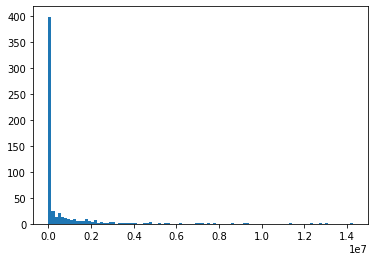

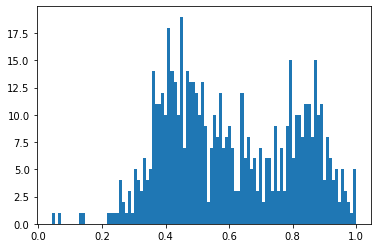

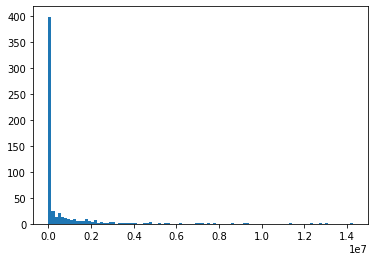

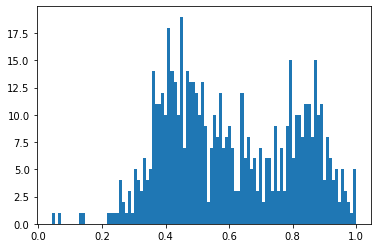

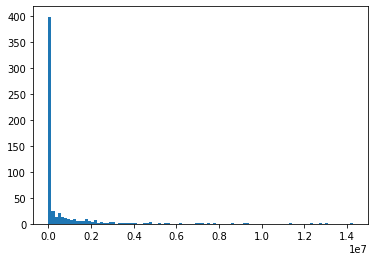

In [201]:
train_df = pd.read_csv("movies_train.csv")
target = train_df.box_off_num

plt.hist(target, bins=100)
plt.show()

target = np.log1p(target)
target = (target - y_min) / (y_max - y_min)
plt.hist(target, bins=100)
plt.show()

reconstruced = target * (y_max - y_min) + y_min
reconstruced = np.exp(reconstruced) - 1
plt.hist(reconstruced, bins=100)
plt.show()

target = np.log1p(reconstruced)
target = (target - y_min) / (y_max - y_min)
plt.hist(target, bins=100)
plt.show()

reconstruced = target * (y_max - y_min) + y_min
reconstruced = np.exp(reconstruced) - 1
plt.hist(reconstruced, bins=100)
plt.show()
